In [1]:
exec (open("/Users/pvmarkov/dengue/scripts/functions2.py").read ())
refgenome_file = "/Users/pvmarkov/dengue/data/pDVWSK601-NGC virus.gb"

In [6]:
counts_dataframe = pd.read_csv ("/Users/pvmarkov/dengue/data/mergetwoway_kass_cover_majorb_seqqual>=60ON_alignqualOFF_pairsOFF.csv")
dn_ds_by_codon_dataframe = pd.read_csv ('/Users/pvmarkov/dengue/data/dn_ds_dataframe.csv')
dn_ds_by_codon_dataframe_DENV2 = pd.read_csv ('/Users/pvmarkov/dengue/data/dn_ds_dataframe_DENV2.csv')
pin_pis_dataframe = pd.read_csv ('/Users/pvmarkov/dengue/data/piNpiS_weights_positions.csv')
correction = - getting_position_correction (refgenome_file, ''.join(counts_dataframe ['majorsequence']))

16138


### The code below calculates and puts in a list coordinates of all gene annotations in DENV genome.

In [7]:
import sys
annotations = '/Users/pvmarkov/dengue/data/ref_geno_anottation_relabel.gff'

try:
    f= open (annotations, 'r')
except IOError:
    print ("Unknown file " + annotations)
    sys.exit()
    
line = ""
annots_list = list ()
line_list = list ()
for l in f:
    if ('CDS' in l or 'UTR' in l) and 'DEN2' not in l and 'Beta-lactamase' not in l:
        line_list = l.split()
        annots_list.append (make_annotation (line_list [12], line_list [3], line_list [4], correction))
#        print (l)
#        print (line_list)
annots_list.sort (key=lambda x: x.start)
print ('The annotations and their positions are: \n',annots_list)
#print (annots_list [0].name)
#print (annots_list [0].start)
            

f.close()

The annotations and their positions are: 
 [5UTR: 0 to 95, "Capsid": 96 to 437, "SP\prM": 396 to 437, "prM": 438 to 935, "M\(mature\form)": 711 to 935, E: 936 to 2420, "NS1": 2421 to 3476, "NS2A": 3477 to 4130, "NS2B": 4131 to 4520, "NS3": 4521 to 6374, "NS4A": 6375 to 6824, "NS4B": 6825 to 7568, "NS5": 7569 to 10271, 3UTR: 10272 to 10722]


AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

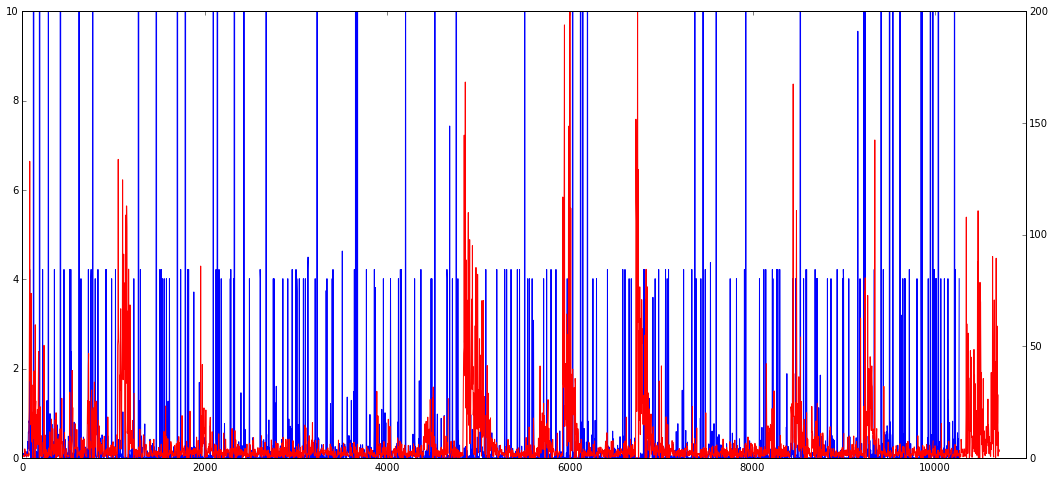

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

moving_average = (runningMeanFast (counts_dataframe ['majorbase_ratio'], 5))
dn_ds_moving_average_DENV2 = (runningMeanFast (dn_ds_by_codon_dataframe_DENV2 ['dn_ds_per_position_in_codon'], 10))

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot (dn_ds_by_codon_dataframe_DENV2 ['codon_numbers']*3, dn_ds_by_codon_dataframe_DENV2 ['dn_ds_per_position_in_codon'], 'b-') #(position, coverage, 'r-')
#ax1.plot (dn_ds_by_codon_dataframe ['codon_numbers']*3, dn_ds_moving_average, 'b-') #(position, coverage, 'r-')


#ax1.legend (['Sequencing coverage'], loc = 'lower left')
axis_lower_limit = 0
axis_upper_limit = 10
ax1.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0


ax2.plot ((pin_pis_dataframe ['codonPosition']+2)*3, (pin_pis_dataframe ['piN'] / pin_pis_dataframe ['expected_pN']) / (pin_pis_dataframe ['piS'] / pin_pis_dataframe ['expected_pS']), 'r-') #(position, coverage, 'r-')

axis_lower_limit = 0
ax2.axis ([0, 11000, axis_lower_limit, 200])
ax2.ylabel ('Proportion of Reads')
ax2.legend (['The most frequent nucleotide'], loc = 'upper right')

for gene in annots_list:
    color_counter +=1
    ax3.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)


AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

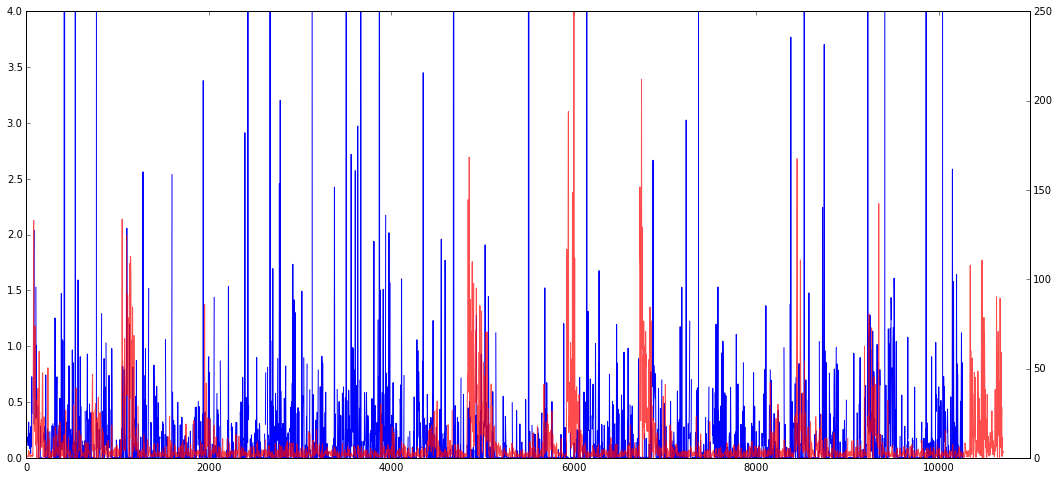

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

moving_average = (runningMeanFast (counts_dataframe ['majorbase_ratio'], 5))
dn_ds_moving_average_DENV2 = (runningMeanFast (dn_ds_by_codon_dataframe_DENV2 ['dn_ds_filtered_uniformative_sites'], 10))

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot (dn_ds_by_codon_dataframe_DENV2 ['codon_numbers']*3, dn_ds_by_codon_dataframe_DENV2 ['dn_ds_filtered_uniformative_sites'], 'b-') #(position, coverage, 'r-')
#ax1.plot (dn_ds_by_codon_dataframe ['codon_numbers']*3, dn_ds_moving_average, 'b-') #(position, coverage, 'r-')


#ax1.legend (['Sequencing coverage'], loc = 'lower left')
axis_lower_limit = 0
axis_upper_limit = 4
ax1.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0


ax2.plot ((pin_pis_dataframe ['codonPosition']+2)*3, (pin_pis_dataframe ['piN'] / pin_pis_dataframe ['expected_pN']) / (pin_pis_dataframe ['piS'] / pin_pis_dataframe ['expected_pS']), 'r-', alpha = 0.7) #(position, coverage, 'r-')


axis_lower_limit = 0
ax2.axis ([0, 11000, axis_lower_limit, 250])
ax2.ylabel ('Proportion of Reads')
ax2.legend (['The most frequent nucleotide'], loc = 'upper right')

for gene in annots_list:
    color_counter +=1
    ax3.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)


### Fig 1. Plot of genetic diversity by genome position of: 
- Our own pilot DENV4 reads (in red, dips = higher diversity, right hand axis). The red graph shows the proportion of reads at a nucleotide site that feature the consensus and so the lower that value is (downward spikes) the more diversity there is at that site. 
- dN/dS  (per codon) in the DENV4 complete genome alignment downloaded from Genbank (in blue, peaks = high dN/dS, left hand axis).

The red graph is the same as the red graph you have seen in earlier analysis - the downward spikes highlighting sites which are less conserved or more polymorphic than the rest.



AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

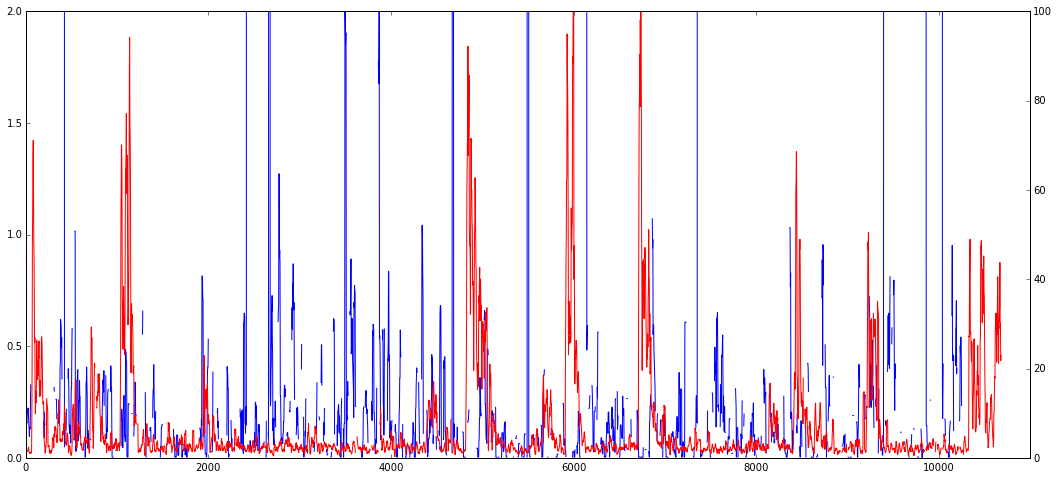

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

moving_average = (runningMeanFast (counts_dataframe ['majorbase_ratio'], 5))
dn_ds_moving_average_DENV2 = (runningMeanFast (dn_ds_by_codon_dataframe_DENV2 ['dn_ds_filtered_uniformative_sites'], 5))
pin_pis_moving_average = (runningMeanFast (((pin_pis_dataframe ['piN'] / pin_pis_dataframe ['expected_pN']) / (pin_pis_dataframe ['piS'] / pin_pis_dataframe ['expected_pS'])), 5))     

ax1 = plt.gca()
ax2 = ax1.twinx()
#ax1.plot (dn_ds_by_codon_dataframe ['codon_numbers']*3, dn_ds_by_codon_dataframe ['dn_ds_per_position_in_codon'], 'b-') #(position, coverage, 'r-')
ax1.plot (dn_ds_by_codon_dataframe_DENV2 ['codon_numbers']*3, dn_ds_moving_average_DENV2, 'b-') #(position, coverage, 'r-')


#ax1.legend (['Sequencing coverage'], loc = 'lower left')
axis_lower_limit = 0
axis_upper_limit = 2
ax1.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0


ax2.plot ((pin_pis_dataframe ['codonPosition']+2)*3, pin_pis_moving_average, 'r-') #(position, coverage, 'r-')

axis_lower_limit = 0
ax2.axis ([0, 11000, axis_lower_limit, 100])
ax2.ylabel ('Proportion of Reads')
ax2.legend (['The most frequent nucleotide'], loc = 'upper right')

for gene in annots_list:
    color_counter +=1
    ax3.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

### Fig 2. Plot of genetic diversity by genome position of: 
- Our own pilot DENV4 reads (in red, dips = higher diversity) alongside 
- dN/dS  (per codon) in the DENV4 complete genome alignment downloaded from Genbank (in blue, peaks = high dN/dS).

### The difference from previous figure is that the blue graph is a smoothed version (moving average, 5 codons window) of dN/dS.

AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

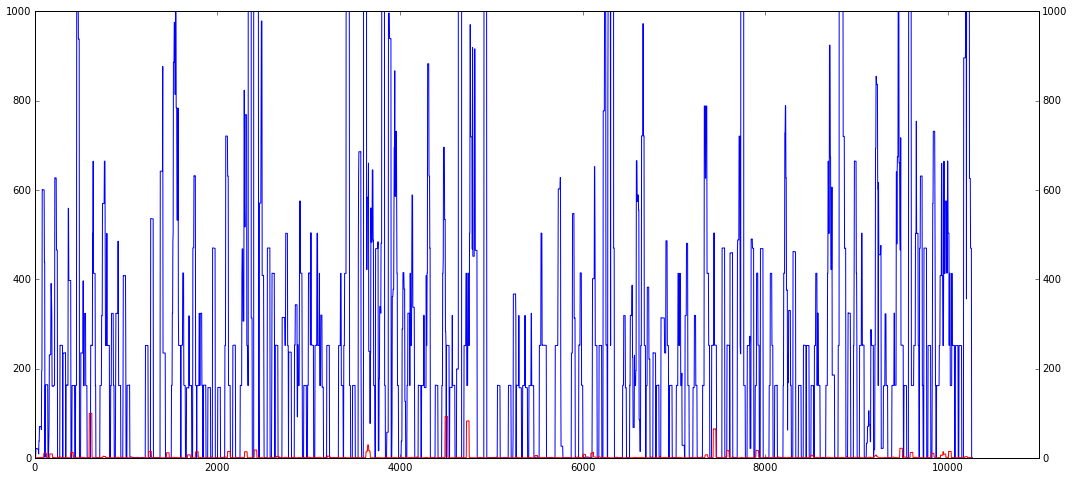

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

moving_average = (runningMeanFast (counts_dataframe ['majorbase_ratio'], 5))
dn_ds_moving_average = (runningMeanFast (dn_ds_by_codon_dataframe ['dn_ds_per_position_in_codon'], 10))
dn_ds_moving_average_DENV2 = (runningMeanFast (dn_ds_by_codon_dataframe_DENV2 ['dn_ds_per_position_in_codon'], 10))

ax1 = plt.gca()
ax2 = ax1.twinx()
#ax1.plot (dn_ds_by_codon_dataframe ['codon_numbers']*3, dn_ds_by_codon_dataframe ['dn_ds_per_position_in_codon'], 'b-') #(position, coverage, 'r-')
ax1.plot (dn_ds_by_codon_dataframe ['codon_numbers']*3, dn_ds_moving_average, 'b-') #(position, coverage, 'r-')


#ax1.legend (['Sequencing coverage'], loc = 'lower left')
axis_lower_limit = 0
axis_upper_limit = 1000
ax1.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0


ax2.plot (dn_ds_by_codon_dataframe_DENV2 ['codon_numbers']*3, dn_ds_moving_average_DENV2, 'r-')

axis_lower_limit = 0
ax2.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
ax2.ylabel ('Proportion of Reads')
ax2.legend (['The most frequent nucleotide'], loc = 'upper right')

for gene in annots_list:
    color_counter +=1
    ax3.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

### Please ignore - this plot is just a technical comparison for data quality check.
Fig 3. Comparison of dN/dS obtained from the earlier crud data (blue) and from the more refined later data (red).

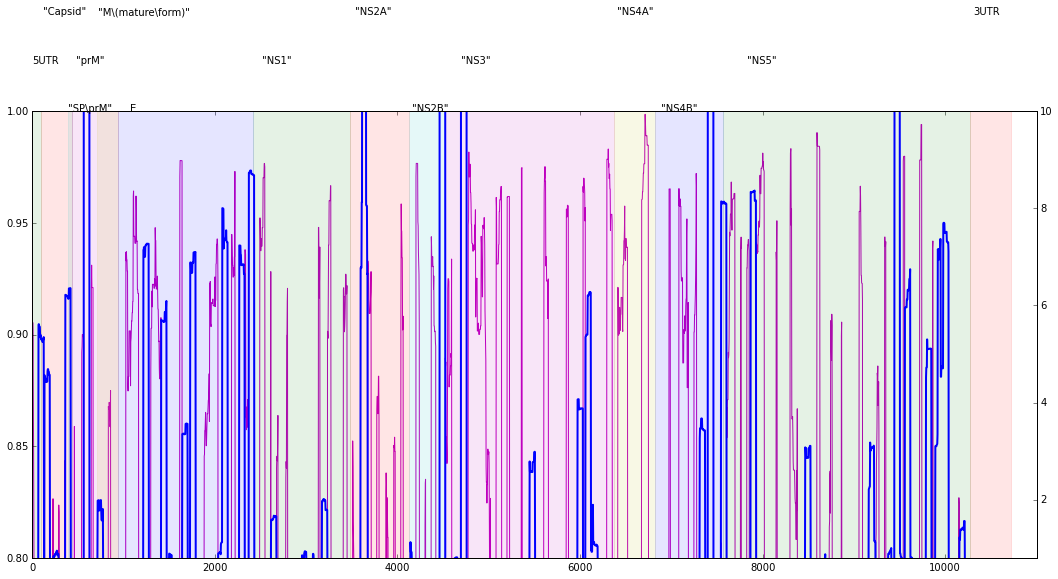

In [9]:
moving_average = (runningMeanFast (counts_dataframe ['majorbase_ratio'], 5))
dn_ds_moving_average = (runningMeanFast (dn_ds_by_codon_dataframe ['dn_ds_per_position_in_codon'], 20))
dn_ds_moving_average_DENV2 = (runningMeanFast (dn_ds_by_codon_dataframe_DENV2 ['dn_ds_per_position_in_codon'], 20))

ax1 = plt.gca()
ax2 = ax1.twinx()
ax3 = plt.gca()
#ax1.plot (dn_ds_by_codon_dataframe ['codon_numbers']*3, dn_ds_by_codon_dataframe ['dn_ds_per_position_in_codon'], 'b-') #(position, coverage, 'r-')
ax1.plot (dn_ds_by_codon_dataframe_DENV2 ['codon_numbers']*3, 1 - dn_ds_moving_average_DENV2, 'm-', linewidth=1.0)



#ax1.legend (['Sequencing coverage'], loc = 'lower left')
axis_lower_limit = 0.8
axis_upper_limit = 1
ax1.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0


ax2.plot (dn_ds_by_codon_dataframe_DENV2 ['codon_numbers']*3, dn_ds_moving_average_DENV2, 'b-', linewidth=2.0) #(position, coverage, 'r-')

axis_upper_limit = 10
ax2.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
#ax2.ylabel ('Proportion of Reads')
#ax2.legend (['The most frequent nucleotide'], loc = 'upper right')

for gene in annots_list:
    color_counter +=1
    ax3.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10 + (1 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

### Fig 4. Negative (purple) vs. positive (blue) selection along the DENV4 (Genbank) genome. 
- The purple line plots the value of 1-dN/dS. Because the scale (on the left axis) is from 0 to 1, the graph only shows "inverted" values of dN/dS under 1. Peaks in the purple graph therefore represent the lowest dN/dS values of those under one, i.e. indicating conserved sequence regions.
- Blue line is as before, only the scale (on the right axis) is a little different.


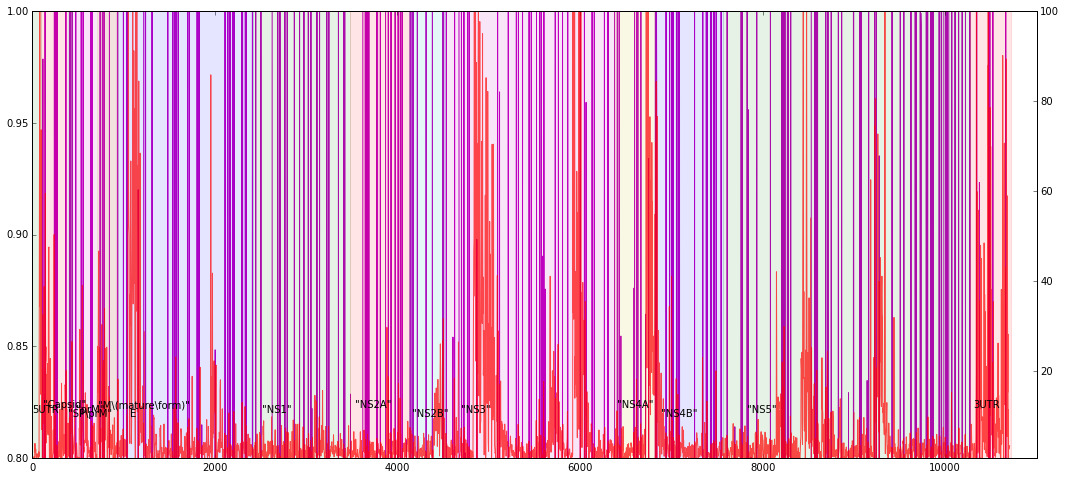

In [44]:
moving_average = (runningMeanFast (counts_dataframe ['majorbase_ratio'], 5))
dn_ds_moving_average = (runningMeanFast (dn_ds_by_codon_dataframe ['dn_ds_per_position_in_codon'], 20))
dn_ds_moving_average_DENV2 = (runningMeanFast (dn_ds_by_codon_dataframe_DENV2 ['dn_ds_per_position_in_codon'], 20))

ax1 = plt.gca()
ax2 = ax1.twinx()
ax3 = plt.gca()
#ax1.plot (dn_ds_by_codon_dataframe ['codon_numbers']*3, dn_ds_by_codon_dataframe ['dn_ds_per_position_in_codon'], 'b-') #(position, coverage, 'r-')
ax1.plot ((pin_pis_dataframe ['codonPosition']+2)*3, 1 - ((pin_pis_dataframe ['piN'] / pin_pis_dataframe ['expected_pN']) / (pin_pis_dataframe ['piS'] / pin_pis_dataframe ['expected_pS'])), 'm-', linewidth=1.0)


#ax1.legend (['Sequencing coverage'], loc = 'lower left')
axis_lower_limit = 0.8
axis_upper_limit = 1
ax1.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0


ax2.plot ((pin_pis_dataframe ['codonPosition']+2)*3, (pin_pis_dataframe ['piN'] / pin_pis_dataframe ['expected_pN']) / (pin_pis_dataframe ['piS'] / pin_pis_dataframe ['expected_pS']), 'r-', alpha = 0.7) #(position, coverage, 'r-')

axis_upper_limit = 100
ax2.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
#ax2.ylabel ('Proportion of Reads')
#ax2.legend (['The most frequent nucleotide'], loc = 'upper right')

for gene in annots_list:
    color_counter +=1
    ax3.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10 + (1 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

In [43]:
pin_pis_dataframe['adjusted_pin_pis'] = (pin_pis_dataframe ['piN'] / pin_pis_dataframe ['expected_pN']) / (pin_pis_dataframe ['piS'] / pin_pis_dataframe ['expected_pS'])
pin_pis_dataframe.describe()

,codonPosition,coverage,expected_pN,expected_pS,expected_pStops,piN,piS,piStop,adjusted_pin_pis
count,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000,3551.000000
mean,1783.501399,116015.283436,6.593173,1.942361,0.451875,1305.674594,154.716284,87.841074,inf
std,1031.866838,25663.546117,1.062354,1.085245,0.630688,2322.127136,1641.693329,536.018143,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,890.250000,104245.000000,6.000000,1.000000,0.000000,388.000000,38.000000,2.000000,1.093465
50%,1783.500000,116868.500000,6.000000,2.000000,0.000000,528.000000,64.000000,12.000000,2.364286
75%,2676.750000,129054.500000,7.000000,3.000000,1.000000,946.500000,107.000000,50.000000,5.224195
max,3570.000000,192847.000000,9.000000,4.000000,2.000000,17945.000000,88231.000000,12517.000000,inf


/Users/pvmarkov/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


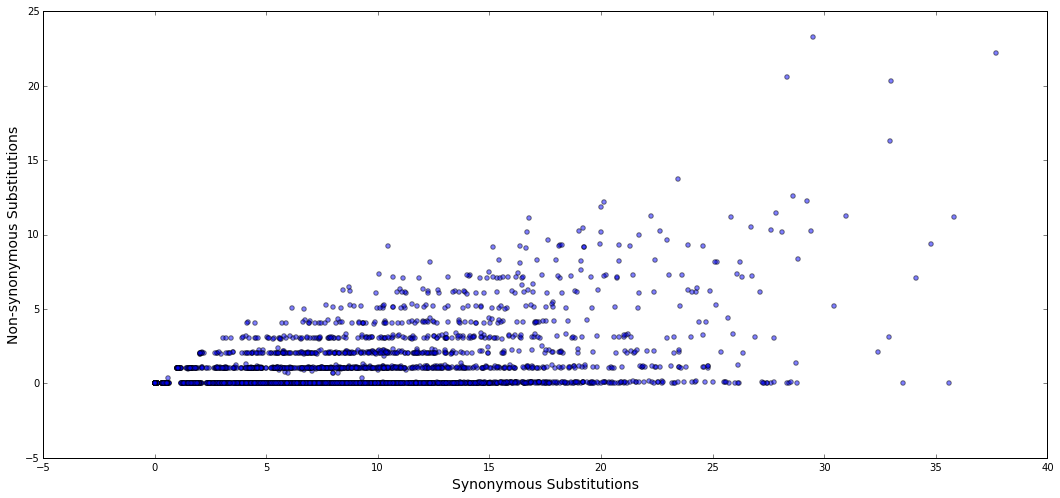

In [36]:
N = 50


#highcover_dataframe = counts_dataframe [counts_dataframe['coverage'] > 100000]

x = dn_ds_by_codon_dataframe_DENV2 ['synonymous_substitutions']
y = dn_ds_by_codon_dataframe_DENV2 ['non_synonymous_substitutions']
#colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses




plt.scatter(x, y, alpha=0.5)
plt.xlabel ('Synonymous Substitutions', fontsize=14)
plt.ylabel ('Non-synonymous Substitutions', fontsize=14)
#plt.legend (['Rleationship between coverage and invariability'], loc = 'lower right')
#fit = np.polyfit(x,y,1)
#fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

#plt.plot(x, fit_fn(x), '-r')
#plt.show()

### Fig 5. Scatter plot of synonymous vs. non-synonymous substitutions per codon position in the DENV2 Genbank alignment.

/Users/pvmarkov/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


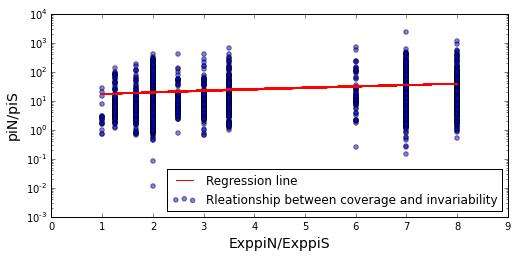

The slope is: 3.11081346608, The intercept is: 13.9125470829


(0.10876190190453633, 3.2990088788231951e-10)

In [64]:
N = 50

import scipy.stats
import math

#highcover_dataframe = counts_dataframe [counts_dataframe['coverage'] > 100000]

pin_pis_nolowvalues_dataframe = pin_pis_dataframe [(pin_pis_dataframe['piS'] > 0)]
pin_pis_nolowvalues_dataframe = pin_pis_nolowvalues_dataframe [(pin_pis_nolowvalues_dataframe['expected_pS'] > 0)]


x = pin_pis_nolowvalues_dataframe ['expected_pN'] / pin_pis_nolowvalues_dataframe ['expected_pS']
y = pin_pis_nolowvalues_dataframe ['piN'] / pin_pis_nolowvalues_dataframe ['piS']
#colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses


ax = plt.subplot(224)
ax.set_yscale("log", nonposy='clip')

plt.scatter(x, y, alpha=0.5)
plt.xlabel ('ExppiN/ExppiS', fontsize=14)
plt.ylabel ('piN/piS', fontsize=14)




fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x, fit_fn(x), '-r')
plt.legend (['Regression line', 'Rleationship between coverage and invariability'], loc = 'lower right')
plt.show()

beta, a = np.polyfit(x, y, 1)
print ('The slope is: ' + str (beta) + ', The intercept is: ' + str (a))

scipy.stats.pearsonr(x, y)




10716
10275


(-0.078764003769413574, 7.0489702923651575e-14)

/Users/pvmarkov/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


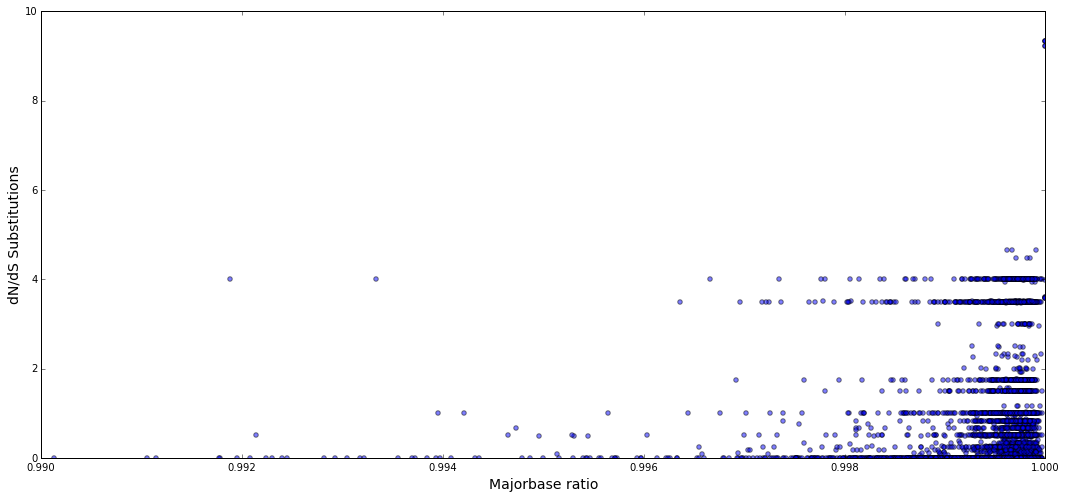

In [37]:

import scipy.stats
N = 50

import math
#highcover_dataframe = counts_dataframe [counts_dataframe['coverage'] > 100000]

x = counts_dataframe ['majorbase_ratio']
y = dn_ds_by_codon_dataframe ['dn_ds_per_position_in_codon']
dn_ds_per_nucleotide=list()
for i in y: # this creates a list of the dn/ds values, but per nucleotide position (not per codon). It simply tripples the number of positions.
    dn_ds_per_nucleotide.append (i)
    dn_ds_per_nucleotide.append (i)
    dn_ds_per_nucleotide.append (i)

y=dn_ds_per_nucleotide
print(len(x))
print(len(y))
#colors = np.random.rand(N)

majorbase_dn_ds_dataframe = pd.DataFrame ({'majorbase': x[0:10000], 'dn_ds': y[0:10000]}) # this creates a dataframe of both majorbase and dn/ds

majorbase_dn_ds_dataframe_filtered = majorbase_dn_ds_dataframe [majorbase_dn_ds_dataframe ['dn_ds'] < 10] # this creates a new dataframe only containing the records where dn_ds <10

area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses


axis_upper_limit = 10
plt.axis ([0.99, 1, 0, axis_upper_limit])


plt.scatter(majorbase_dn_ds_dataframe_filtered ['majorbase'], majorbase_dn_ds_dataframe_filtered ['dn_ds'], alpha=0.5)
plt.xlabel ('Majorbase ratio', fontsize=14)
plt.ylabel ('dN/dS Substitutions', fontsize=14)

scipy.stats.pearsonr(majorbase_dn_ds_dataframe_filtered ['majorbase'], majorbase_dn_ds_dataframe_filtered ['dn_ds'])


### Please ignore - this plot is just a technical comparison for data quality check.
Fig 6. Scatter plot of mojorbase (diversity in our pilot experimental DENV4 dataset) vs. dn/ds in Genbank DENV4 dataset, USING THE OLD DATA - JUST TO COMPARE TO FIGURE BELOW, after removing extreme (>10, perhaps artefactual) dn/ds values.

10716
10269


(0.0033616865480607431, 0.75511280502539668)

/Users/pvmarkov/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


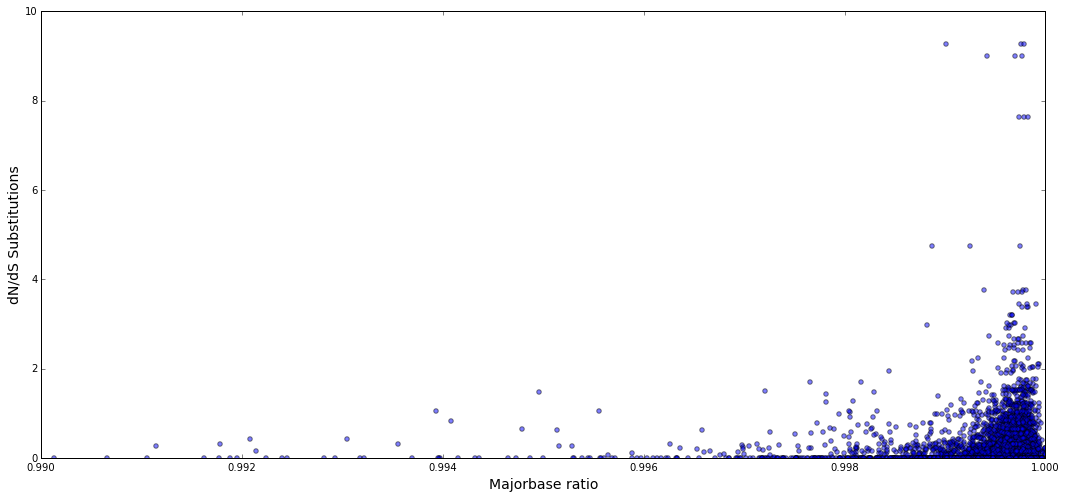

In [38]:

import scipy.stats
N = 50

import math
#highcover_dataframe = counts_dataframe [counts_dataframe['coverage'] > 100000]

x = counts_dataframe ['majorbase_ratio']
y = dn_ds_by_codon_dataframe_DENV2 ['dn_ds_filtered_uniformative_sites']
dn_ds_per_nucleotide=list()
for i in y: # this creates a list of the dn/ds values, but per nucleotide position (not per codon). It simply tripples the number of positions.
    dn_ds_per_nucleotide.append (i)
    dn_ds_per_nucleotide.append (i)
    dn_ds_per_nucleotide.append (i)

y=dn_ds_per_nucleotide
print(len(x))
print(len(y))
#colors = np.random.rand(N)

majorbase_dn_ds_dataframe = pd.DataFrame ({'majorbase': x[0:10000], 'dn_ds_filtered_uniformative_sites': y[0:10000]}) # this creates a dataframe of both majorbase and dn/ds

majorbase_dn_ds_dataframe_DENV2_filtered = majorbase_dn_ds_dataframe [majorbase_dn_ds_dataframe ['dn_ds_filtered_uniformative_sites'] < 10] # this creates a new dataframe only containing the records where dn_ds <10

area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses


axis_upper_limit = 10
plt.axis ([0.99, 1, 0, axis_upper_limit])


plt.scatter(majorbase_dn_ds_dataframe_DENV2_filtered ['majorbase'], majorbase_dn_ds_dataframe_DENV2_filtered ['dn_ds_filtered_uniformative_sites'], alpha=0.5)
plt.xlabel ('Majorbase ratio', fontsize=14)
plt.ylabel ('dN/dS Substitutions', fontsize=14)

scipy.stats.pearsonr(majorbase_dn_ds_dataframe_DENV2_filtered ['majorbase'], majorbase_dn_ds_dataframe_DENV2_filtered ['dn_ds_filtered_uniformative_sites'])

### Fig 7. Scatter plot of diversity in our pilot experimental DENV4 dataset vs. dn/ds in Genbank DENV4 dataset, after removing extreme (>10, perhaps artefactual) dn/ds values. Not very informative at present.

In [39]:
dn_ds_by_codon_dataframe_DENV2.describe()

,Unnamed: 0,codon_numbers,dn_ds,dn_ds_filtered_uniformative_sites,dn_ds_per_position_in_codon,non_synonymous_substitutions,not_a_number_nonsynonymous,not_a_number_synonymous,synonymous_substitutions,total_substitutions_by_codon
count,3423.000000,3423.000000,3423.000000,2962.000000,3423.000000,3423.000000,3423,3423,3423.000000,3423.000000
mean,1711.000000,1707.985977,4.367319,0.700391,2.183660,0.997719,22,22,8.620686,8.620686
std,988.279313,989.426311,61.978807,10.166336,30.989403,1.958379,0,0,6.119303,6.119303
min,0.000000,-4.000000,0.000275,0.000275,0.000138,0.000705,22,22,0.002360,0.002360
25%,855.500000,851.500000,0.002780,0.002672,0.001390,0.013334,22,22,4.097331,4.097331
50%,1711.000000,1707.000000,0.004370,0.003892,0.002185,0.033074,22,22,7.621237,7.621237
75%,2566.500000,2565.500000,0.256627,0.206941,0.128314,1.052118,22,22,12.147740,12.147740
max,3422.000000,3421.000000,1986.028926,343.836578,993.014463,23.307145,22,22,37.693005,37.693005


### Fig 7 (Multiple plots - below). Scatter plot, by DENV gene, of association between synonymous and non-synonymous substitutions per codon position in the DENV4 Genbank alignment. Same as Fig 5, only by gene.

96 437


/Users/pvmarkov/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


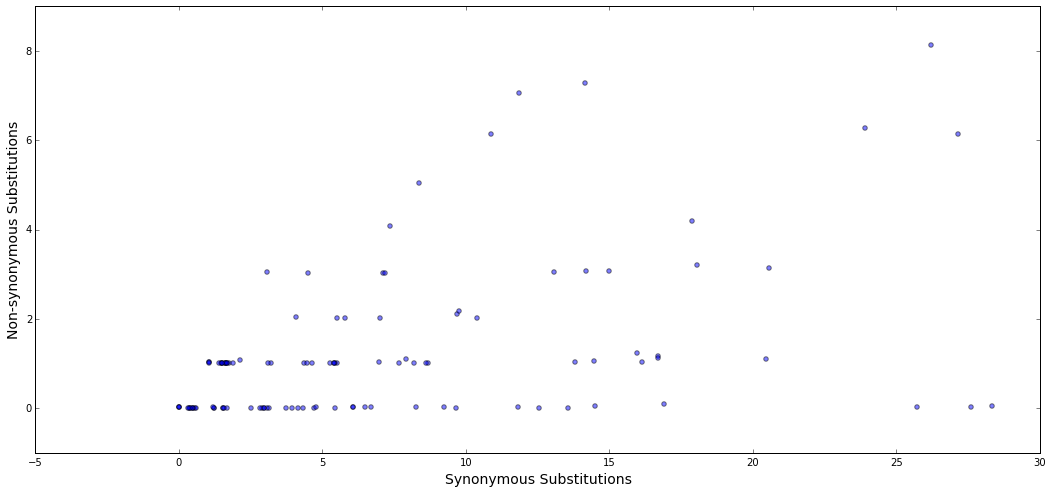

396 437


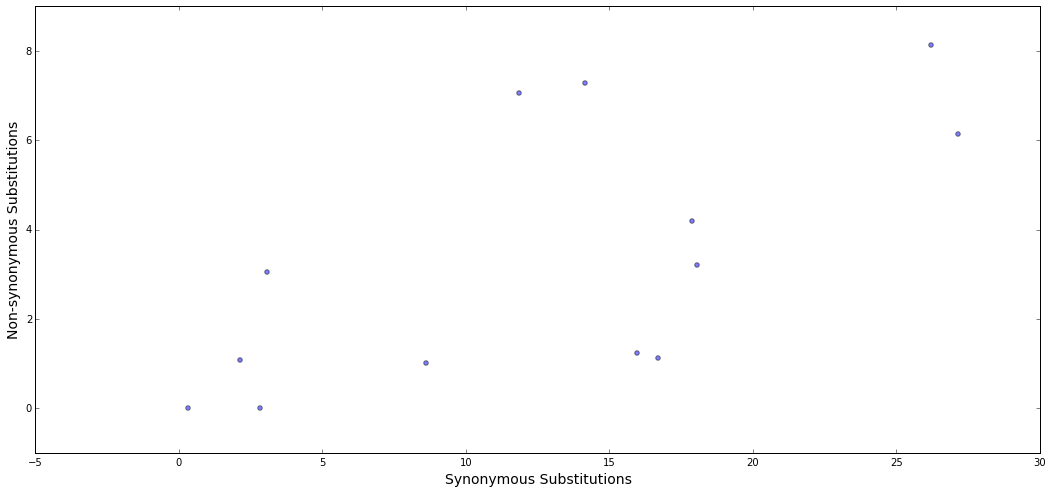

438 935


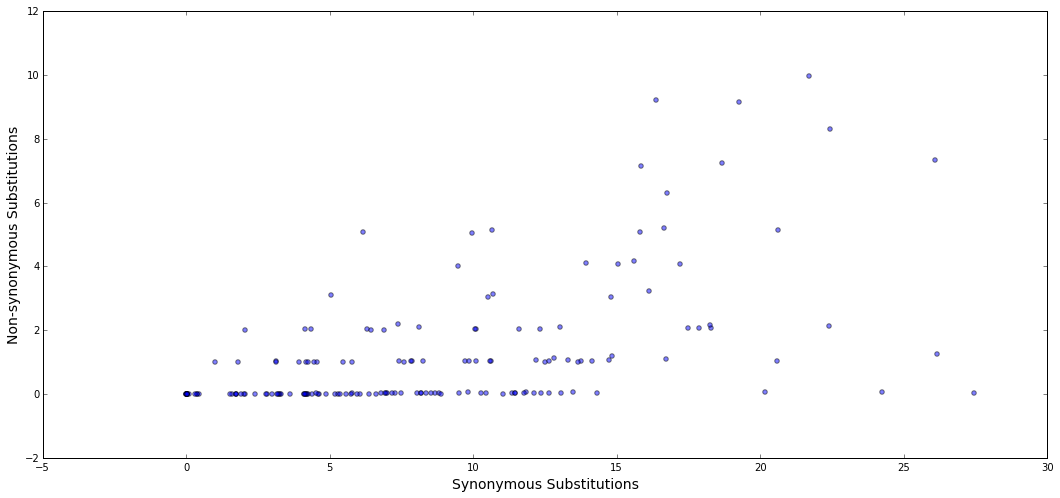

711 935


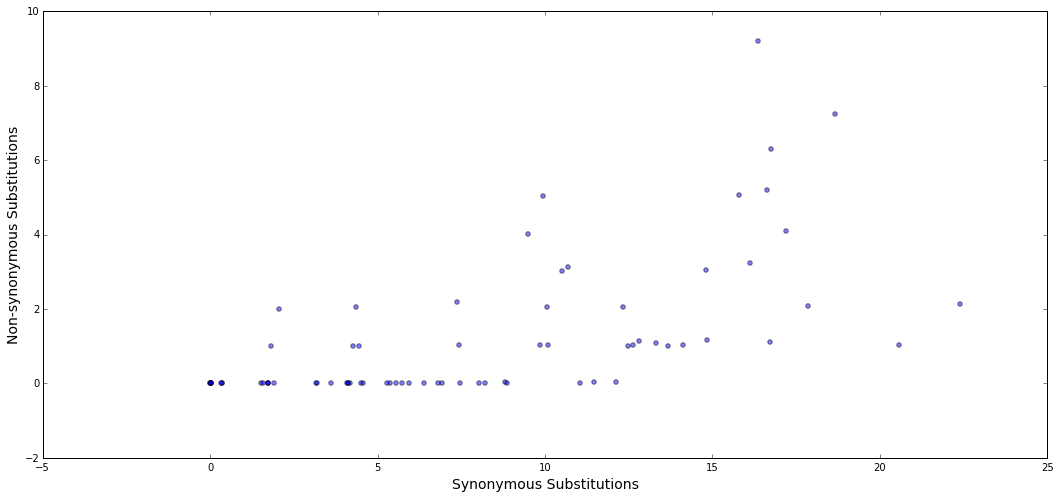

936 2420


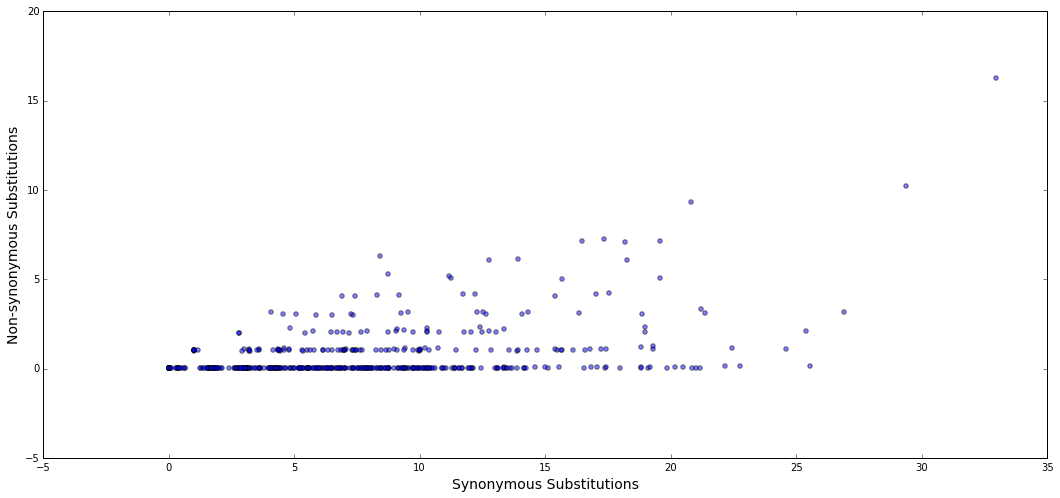

2421 3476


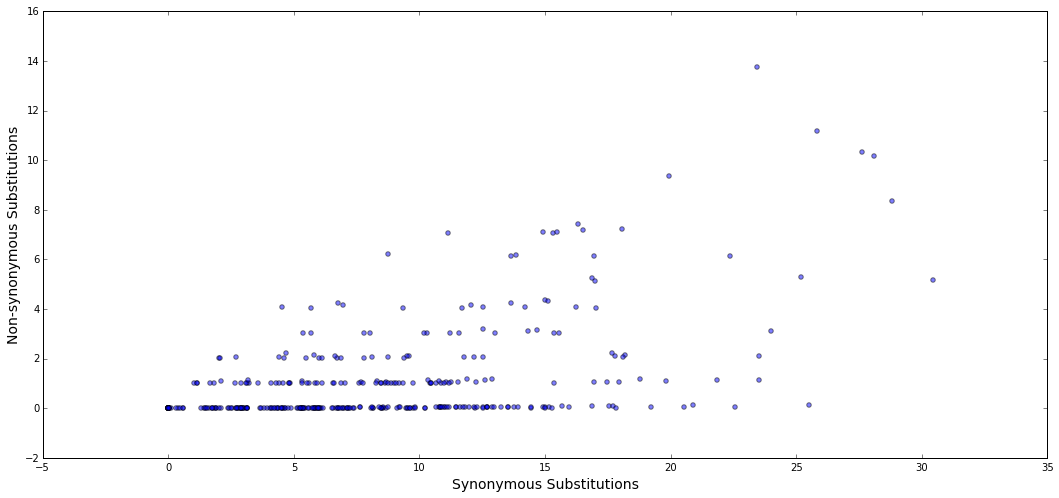

3477 4130


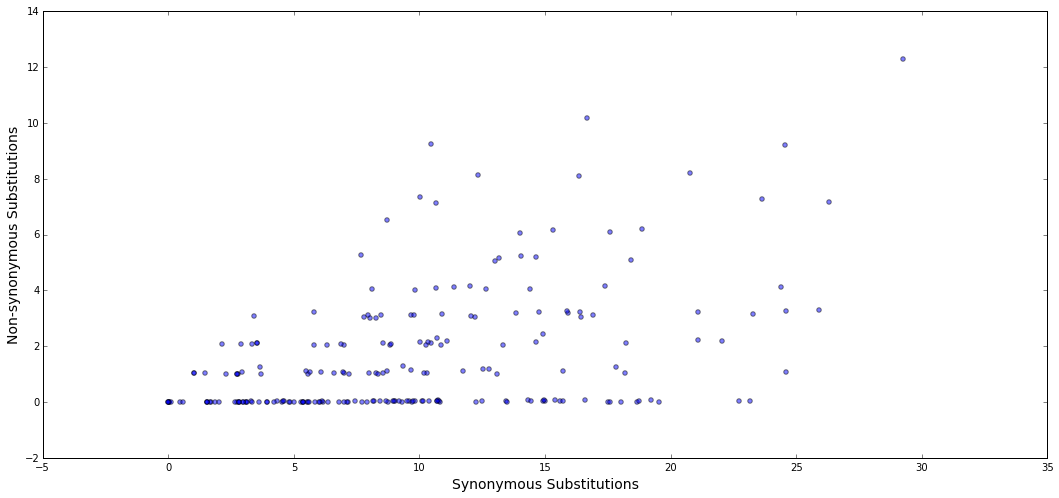

4131 4520


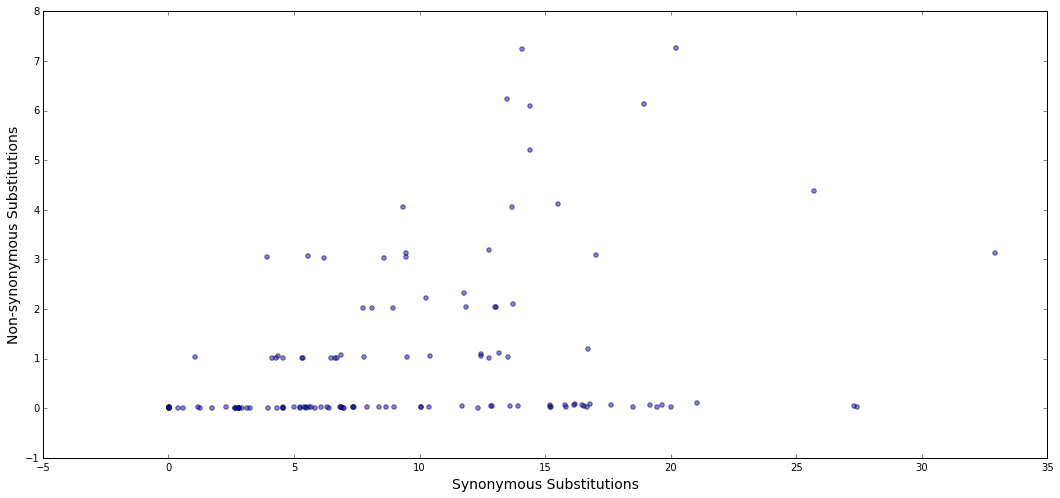

4521 6374


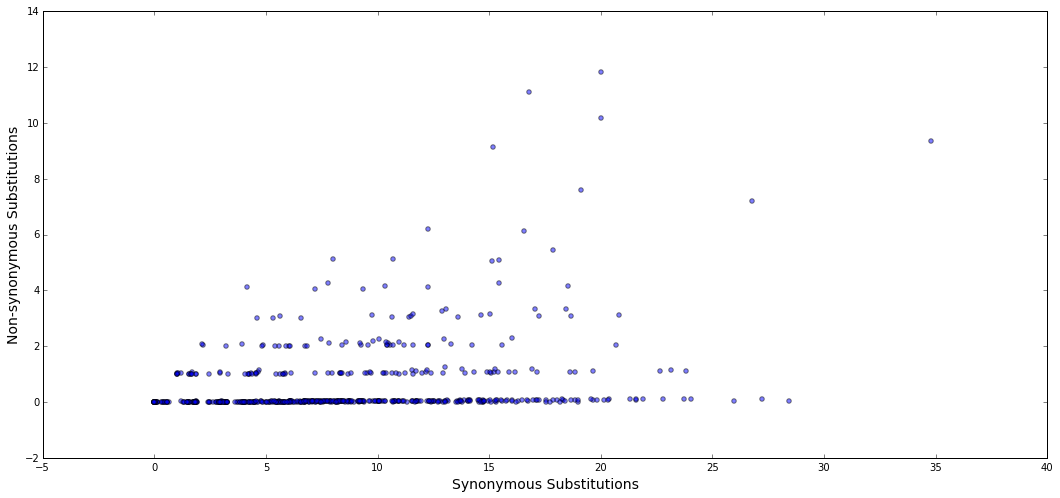

6375 6824


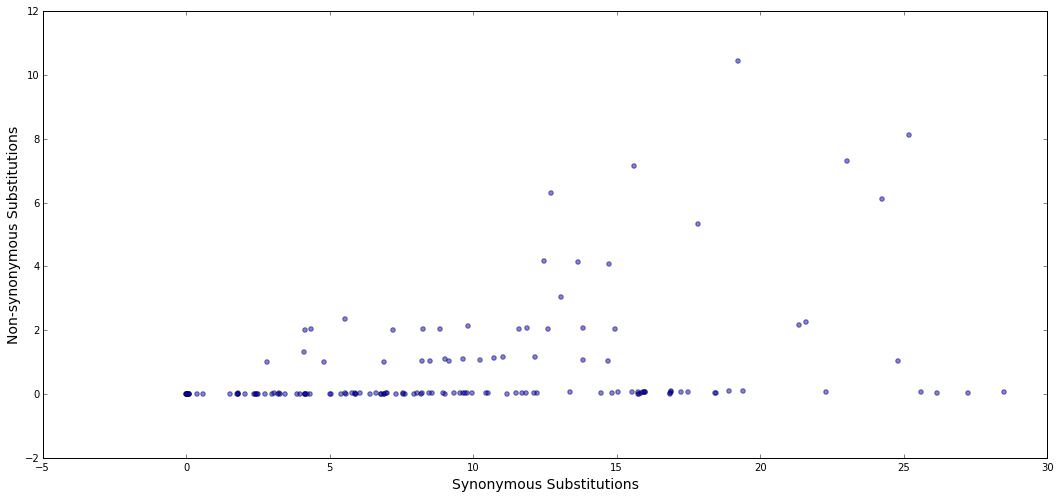

6825 7568


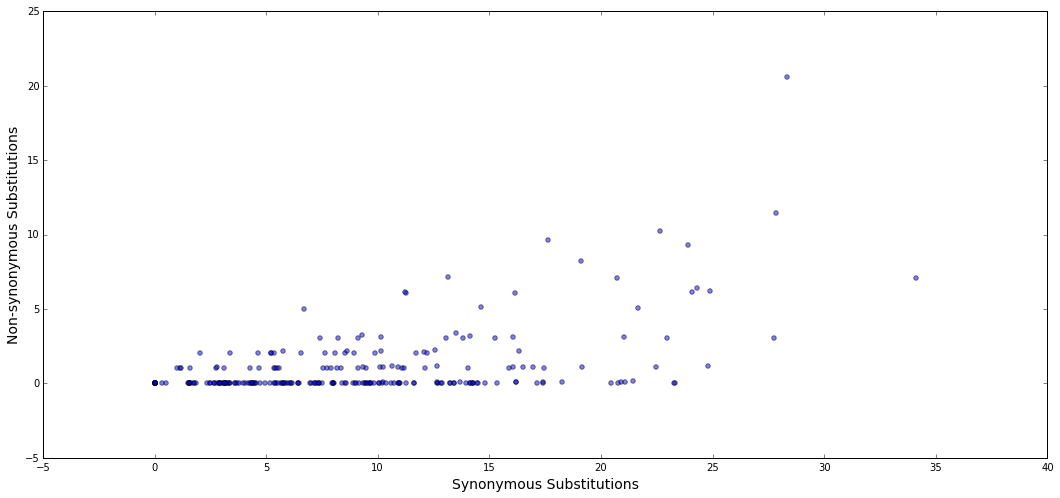

7569 10271


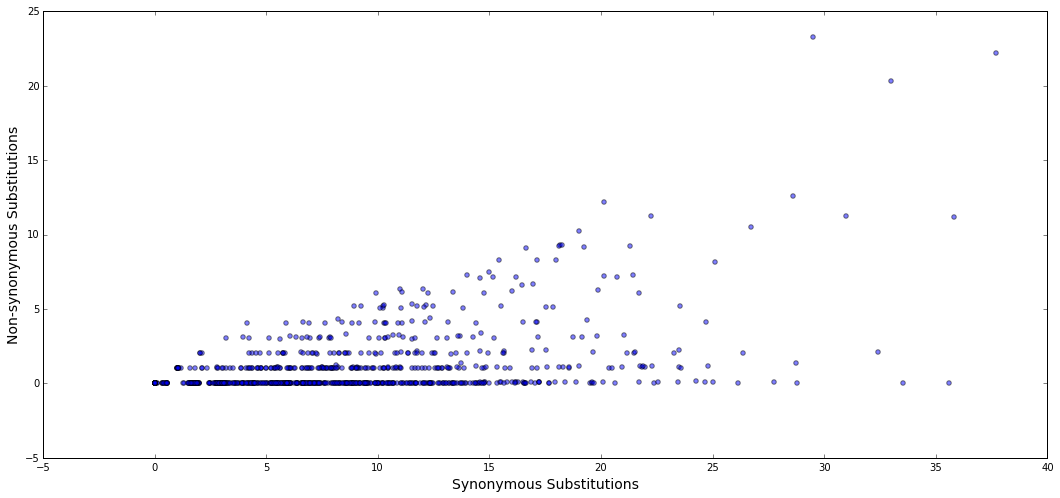

In [40]:

for gene in annots_list:
    if gene.start == 0 or gene.start == 10272:
        pass
    else:
        print (gene.start, gene.end)
        x  = dn_ds_by_codon_dataframe_DENV2 ['synonymous_substitutions'] [int(gene.start/3) : int(gene.end/3)]
        y  = dn_ds_by_codon_dataframe_DENV2 ['non_synonymous_substitutions'] [int(gene.start/3) : int(gene.end/3)]
        
        area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses
        
        plt.scatter(x, y, alpha=0.5)
        plt.xlabel ('Synonymous Substitutions', fontsize=14)
        plt.ylabel ('Non-synonymous Substitutions', fontsize=14)
        plt.show()
